# Demonstration of signal dilatation

This notebook explores the signal dilatation feature.

### Notebook setup

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np

from solardatatools import DataHandler
from solardatatools.dataio import get_pvdaq_data
from solardatatools.algorithms import dilatation

### Load data table

For today's example, we're loading data from NREL's PVDAQ API, which is a publically available PV generatation data set. 

In [4]:
data_frame = get_pvdaq_data(sysid=34, year=range(2011, 2015), api_key='DEMO_KEY')

[============================================================] 100.0% ...queries complete in 5.9 seconds       



### Run the DataHandler pipeline

In [5]:
dh = DataHandler(data_frame)
dh.run_pipeline(power_col='ac_power')
dh.report()

/Users/aramis/Documents/Stanford/PVInsight/solar-data-tools-dev/solar-data-tools/solardatatools/time_axis_manipulation.py:146: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if avg_day[0] >= thresh:
/Users/aramis/Documents/Stanford/PVInsight/solar-data-tools-dev/solar-data-tools/solardatatools/time_axis_manipulation.py:152: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if avg_day[-1] >= thresh:
/Users/aramis/Documents/Stanford/PVInsight/solar-data-tools-dev/solar-data-tools/solardatatools/matrix_embedding.py:41: FutureWarning: Second.delta is deprecated and will be removed in a future version. Use pd.Timedelta(obj) in

total time: 41.11 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              14.93s
Cleaning                   0.73s
Filtering/Summarizing      25.46s
    Data quality           0.44s
    Clear day detect       0.90s
    Clipping detect        20.12s
    Capacity change detect 3.99s


-----------------
DATA SET REPORT
-----------------
length               4.00 years
capacity estimate    107.10 kW
data sampling        15 minutes
quality score        0.96
clearness score      0.55
inverter clipping    False
clipped fraction     0.00
capacity changes     False
data quality warning True
time shift errors    False
time zone errors     False
            


In [6]:
dil = dilatation.Dilatation(dh)

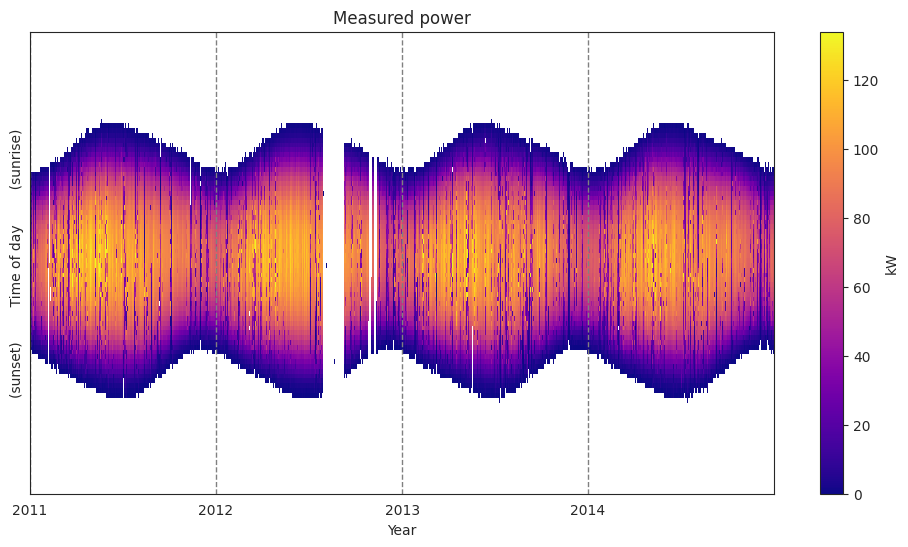

In [7]:
dil.plot_heatmap(space='original');

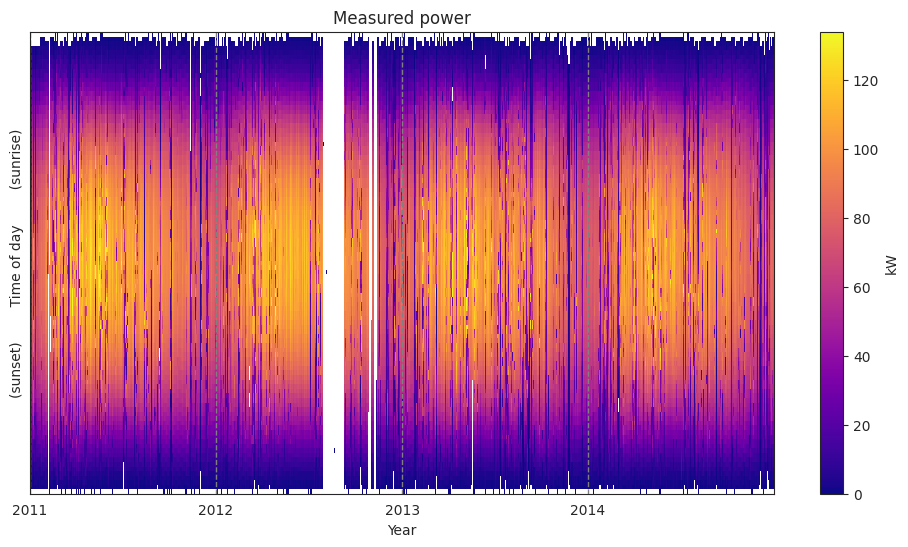

In [8]:
dil.plot_heatmap(space='dilated');